<a href="https://colab.research.google.com/github/albert-melo/ProgCiencia-de-Dados/blob/master/WorkProgCienciaDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho da Disciplina Programação para Ciência de Dados

##Alunos:

> ###Albert Lima de Melo
> ###Cinthia Christina da Silva Cardoso



#Montagem do Drive para acesso a base de dados
Criação do drive para acessar os dados a serem analisados e tratados.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importação da base de dados **_dados-curso-completo.csv_** 
Utilizando a biblioteca do Pandas para leitura do arquivo de dados que estão tabulados no padrão CSV.

In [8]:
import pandas as pd
dados = pd.read_csv("/content/drive/My Drive/dados-curso-completo.csv")


#1. Visão Geral dos Dados

A seguir vamos explorar os dados da base disponibilizada

##1.1 Shape
Formato da base de dados

In [9]:
dados.shape

(1658825, 13)

##1.2 Amostra dos dados
Pequena amostra dos dados


In [10]:
dados.head(10)


,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
0,2020-03-23 18:51:14,Gaboardi,fraslee,@BolsonaroSP Cade o fundão deputado??? Congres...,0,138,pt,NaN,NaN,NaN,NaN,NaN,[]
1,2020-03-18 03:18:14,Seu Zé da Farmácia,seuzedafarmacia,"Em ação preventiva, o Governo do Estado suspen...",0,56,pt,NaN,NaN,NaN,NaN,NaN,[]
2,2020-03-29 12:09:27,Marília Oliveira 🇧🇷,Marioliveira_gb,Incrível como os defensores do fim do distanci...,0,5,pt,NaN,NaN,NaN,NaN,NaN,[]
3,2020-04-01 21:11:07,🚩,santosodeto,Fumaça de cigarro pode propagar coronavírus? h...,0,1885,pt,NaN,NaN,NaN,NaN,NaN,[]
4,2020-03-19 17:49:40,Nova Impressão,novaimpressao_,🚨Todos juntos contra COVID-19💪\n\nSolicite seu...,0,124,pt,Brasília,Brazil,BR,-47.8778,-15.77691,[]
5,2020-05-08 11:21:36,Marcel Silvano,marcelsilvano,"Importantes avanços! A pesquisa brasileira, a ...",4,2769,pt,Macaé,Brazil,BR,NaN,NaN,[]
6,2020-03-10 21:27:40,Teixeira Correia,LidadorNoticias,(Última hora) Volta ao Alentejo: Anulada por c...,0,39,pt,NaN,NaN,NaN,NaN,NaN,[]
7,2020-06-04 13:22:21,Thiago Moraes,ThiagoMoraesPB,João Pessoa tem queda no isolamento social por...,1,3578,pt,NaN,NaN,NaN,NaN,NaN,[]
8,2020-05-07 21:32:12,PT Brasil,ptbrasil,A #tvPT de hoje vai falar sobre a pandemia na ...,10,942696,pt,NaN,NaN,NaN,NaN,NaN,['tvPT']
9,2020-03-11 20:27:49,Niquito ;),NLazaroto,O Coronavirús causou uma pandemia e eu ainda n...,0,215,pt,NaN,NaN,NaN,NaN,NaN,[]


##1.3 Informações sobre os dados


In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658825 entries, 0 to 1658824
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   data        1658825 non-null  object 
 1   usuario     1658768 non-null  object 
 2   apelido     1658825 non-null  object 
 3   texto       1658825 non-null  object 
 4   retweet     1658825 non-null  int64  
 5   seguidores  1658825 non-null  int64  
 6   idioma      1658825 non-null  object 
 7   lugar       74605 non-null    object 
 8   pais        74600 non-null    object 
 9   sigla       74595 non-null    object 
 10  latitude    8720 non-null     float64
 11  longitude   8720 non-null     float64
 12  hashtags    1658825 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 164.5+ MB


##1.4 Descrição dos dados

In [12]:
descricao = dados.describe().round(2)
descricao = descricao.transpose()
descricao

,count,mean,std,min,25%,50%,75%,max
retweet,1658825.0,197.85,6337.64,0.00,0.00,0.00,0.00,1139763.00
seguidores,1658825.0,32572.06,368029.99,0.00,101.00,380.00,1470.00,84241250.00
latitude,8720.0,-40.24,20.81,-123.12,-47.86,-43.96,-38.45,174.79
longitude,8720.0,-11.12,19.17,-37.82,-23.31,-19.62,-7.12,58.26


##1.5 Postagens por países
Gráfico que demonstra o volume de postagens dos Tweets por país informado

In [13]:
dados2 = dados
paises = dados2["pais"].drop_duplicates()
paises = list(paises)
dados2 = dados2[dados2['pais'].isin(paises)]
dados2.drop_duplicates()
grp_pais = dados2.groupby('pais')

In [14]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

Text(0.5, 1.0, 'Postagens por país')

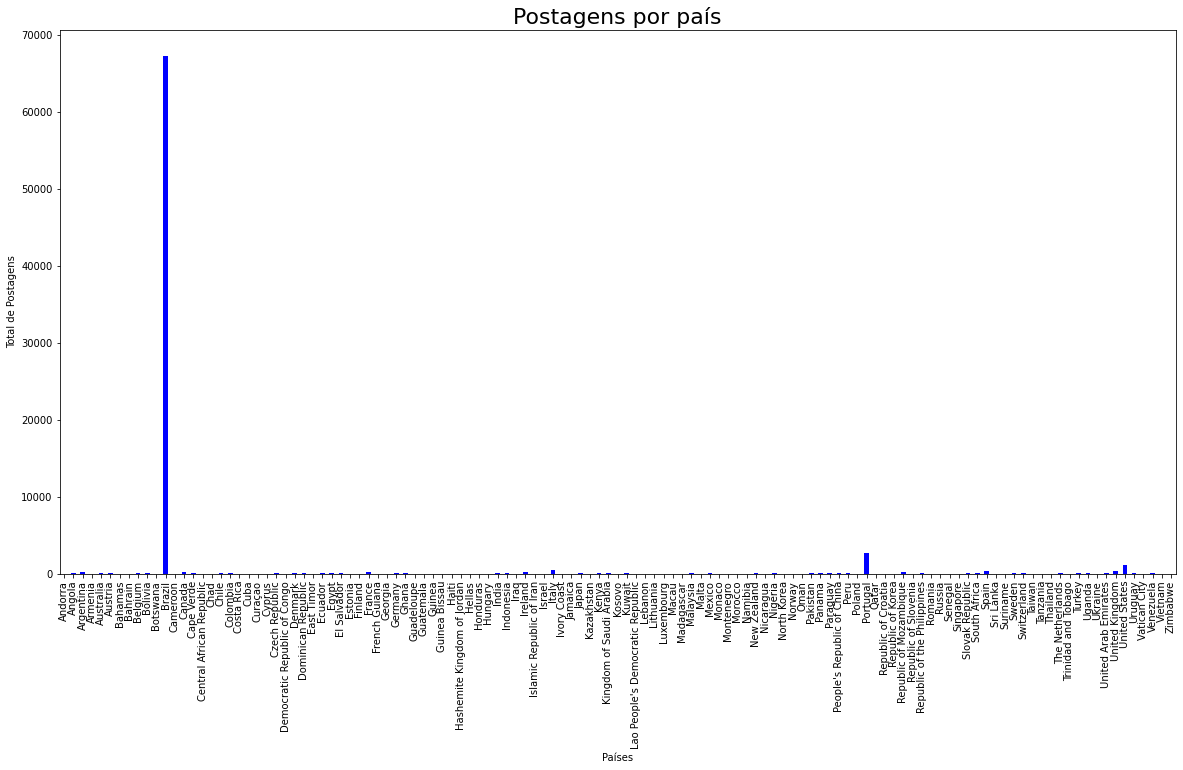

In [15]:
grp_pais[ ['pais'] ].count()

fig = grp_pais['pais'].count().plot.bar(color="blue")
fig.set_ylabel("Total de Postagens")
fig.set_xlabel("Países")
fig.set_title("Postagens por país", {'fontsize': 22})


###1.6 Quantidade de países e comentários com geolocalização

A seguir segue a quantidade de países identificados a partir das postagens realizadas e a quantidade da postagens postagens que possuem geolocalização.

In [16]:
paises = dados["pais"].value_counts()
print("Quandidade de Países:", len(paises))
locais_geo = dados[ dados["longitude"].isna() ==False ]
print("Comentários com geo localização:", len(locais_geo))


Quandidade de Países: 121
Comentários com geo localização: 8720


##1.7 Visualização das postagens pelo mundo
Postagens pelo mundo dos Tweets que possuem geolocalizacao

In [17]:
pip install geopandas

     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 10.9MB 17.8MB/s 
     |████████████████████████████████| 14.8MB 251kB/s 


In [35]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame 

In [36]:
diferencaRegistrosLocais = len(dados) - len(locais_geo)

print("Numero de registros sem geo localização: ", diferencaRegistrosLocais)

Numero de registros sem geo localização:  1650105


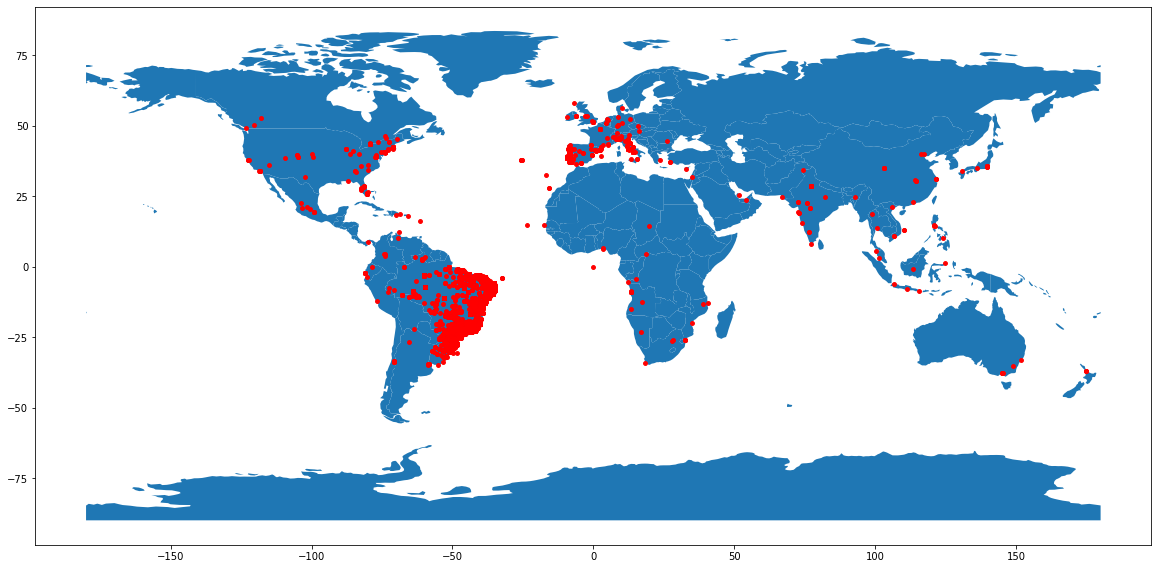

In [20]:
geometry  = [Point(xy) for xy in zip(locais_geo['latitude'], locais_geo['longitude'])]
gdf = GeoDataFrame(locais_geo, geometry = geometry,)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 12)), marker = 'o', color = 'red', markersize = 15)

##2. Gerar base DúvidasDB
As mensagens foram pré-processadas para que as perguntas (questões) fossem identificadas.
Essa coleção de perguntas corresponde ao dataset \DuvidasDB". A seguir, a equipe deve apresentar as estatísticas sobre esses dados.

In [21]:
#Funcao para separar sentenças a partir de um caracter/substring especificada
def separaTexto(texto="", substr=""):
  x = texto.find(substr)
  if x==-1: 
    return "",""
  else:
    return texto[:x+1] , texto[x+1:]
  

In [23]:
#Funcao gera uma lista de sentenças a partir de um caractere informado
def separaPerguntas(texto, caractere):
  perguntas = list()
  while len(texto)>0:
    pergunta, resto = separaTexto(texto, caractere)
    pergunta = pergunta.lstrip(" ")
    if len(pergunta)>1:
      perguntas.append(pergunta)
    if len(resto)==0: break
    texto = resto;
  return perguntas



In [24]:
#Separa os textos que apresentam '?'
pre_perguntas = dados[ dados["texto"].str.contains("?", regex=False) ]

duvidas = list()
i_perguntas = list( pre_perguntas.index )
lista_perguntas = list()
print('Gerando Base de Duvidas ...')
for i in range(len(i_perguntas)):
  lista_perguntas = separaPerguntas( pre_perguntas.texto[i_perguntas[i]], "?")
  for p in range(len(lista_perguntas)):
    registro = {'data':'', 'usuario':'' , 'apelido':'', 'duvida':'', 'retweet':'', 'seguidores':'', 'idioma':'', 'lugar':'', 'pais':'', 'sigla': '', 'latitude':'' , 'longitude':'', 'hashtags':'', 'tema':'' }
    registro['data'] = pre_perguntas.data[i_perguntas[i]]
    registro['usuario'] = pre_perguntas.usuario[i_perguntas[i]]
    registro['apelido'] = pre_perguntas.apelido[i_perguntas[i]]
    registro['duvida'] = lista_perguntas[p]
    registro['retweet'] = pre_perguntas.retweet[i_perguntas[i]]
    registro['seguidores'] = pre_perguntas.seguidores[i_perguntas[i]]
    registro['idioma'] = pre_perguntas.idioma[i_perguntas[i]]
    registro['lugar'] = pre_perguntas.lugar[i_perguntas[i]]
    registro['pais'] = pre_perguntas.pais[i_perguntas[i]]
    registro['sigla'] = pre_perguntas.sigla[i_perguntas[i]]
    registro['latitude'] = pre_perguntas.latitude[i_perguntas[i]]
    registro['longitude'] = pre_perguntas.longitude[i_perguntas[i]]
    registro['hashtags'] = pre_perguntas.hashtags[i_perguntas[i]]
    registro['tema'] = 'a definir'
    duvidas.append(registro)

duvidasDB = pd.DataFrame(duvidas)
print("...Finalizado")
#duvidasDB.to_csv("/content/drive/My Drive/duvidasdb.csv", index=False)
duvidasDB.info()

Gerando Base de Duvidas ...
...Finalizado
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199142 entries, 0 to 199141
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   data        199142 non-null  object 
 1   usuario     199135 non-null  object 
 2   apelido     199142 non-null  object 
 3   duvida      199142 non-null  object 
 4   retweet     199142 non-null  int64  
 5   seguidores  199142 non-null  int64  
 6   idioma      199142 non-null  object 
 7   lugar       8997 non-null    object 
 8   pais        8997 non-null    object 
 9   sigla       8997 non-null    object 
 10  latitude    665 non-null     float64
 11  longitude   665 non-null     float64
 12  hashtags    199142 non-null  object 
 13  tema        199142 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 21.3+ MB


In [25]:
#Separa os textos que apresentam '?'
pre_perguntas = dados[ dados["texto"].str.contains("?", regex=False) ]

#Converte conteúdo de texto em minúsculo
registro = {'data':'', 'usuario':'', 'apelido':'', 'duvida':'', 'retweet':'', 'seguidores':'', 'idioma':'', 'lugar':'', 'pais':'', 'sigla': '', 'latitude':'' , 'longitude':'', 'hashtags':'', 'tema':'' }
#registro = {'data':'', 'duvida':'', 'lugar':'', 'pais':'', 'sigla': '', 'latitude':'' , 'longitude':'', 'tema':"" }
duvidas = list()
i_perguntas = list( pre_perguntas.index )
lista_perguntas = list()
pre_perguntas.texto
i_perguntas
print(registro['lugar'])

registro['usuario']=pre_perguntas.usuario[i_perguntas[1]]
registro['usuario']


'🚩'

##2.1 Importando DuvidasDB

In [26]:
duvidasDB = pd.read_csv("/content/drive/My Drive/duvidasdb.csv")


#3 Análise dos dados do DuvidasDB
A seguir vamos explorar os dados da base DuvidasDB gerada.

##3.1 Shape
Formato da base de dados

In [43]:
duvidasDB.shape

(199142, 2)

##3.2 Amostra dos dados
Pequena amostra dos dados


In [44]:
duvidasDB.head(10)

,mes,duvida
0,03,@BolsonaroSP Cade o fundão deputado?
1,04,Fumaça de cigarro pode propagar coronavírus?
2,06,@ipratesMD @dr_pampers Será que corremos o ris...
3,04,Prioridade ?
4,03,"Que tal uma notícia boa, indo na contramão do ..."
5,04,@JoseMedeirosMT Seria isso algum tipo aleatóri...
6,04,"""Nova York é o novo epicentro da pandemia de c..."
7,05,@mitags Será por que o Bolsonaro não fez propa...
8,04,@JeanSCorrea7 Mas ele não deu a entender que o...
9,04,#perguntacorona \nQuero saber se a covid tem c...


##3.3 Informações do DuvidaDB

In [45]:
duvidasDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199142 entries, 0 to 199141
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   mes     199142 non-null  object
 1   duvida  199142 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


##3.4 Descrição dos dados

In [48]:
duvidasDB.describe()

,mes,duvida
count,199142,199142
unique,6,186832
top,04,!?
freq,50878,1308


##Visualização das postagens pelo mundo
Perguntas pelo mundo dos Tweets que possuem geolocalizacao

In [28]:
pip install geopandas

In [30]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [46]:
diferencaRegistrosLocais = len(duvidasDB) - len(locais_geo)

print("Numero de registros sem geo localização: ", diferencaRegistrosLocais)

Numero de registros sem geo localização:  190422


In [47]:
geometry = [Point(xy) for xy in zip(duvidasDB['latitude'], duvidasDB['longitude'])]
gdf = GeoDataFrame(duvidasDB, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 12)), marker='o', color='green', markersize=20);

KeyError: ignored


##Evolução das perguntas ao longo dos ano

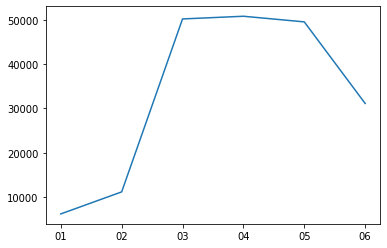

<Figure size 7200x14400 with 0 Axes>

In [27]:
meses = ['Janeiro','Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

duvidasDB['data'] = pd.to_datetime(duvidasDB['data'])
duvidasDB['mes'] = duvidasDB['data'].dt.strftime('%m')
duvidasDB = duvidasDB[ ['mes', 'duvida'] ]

#duvidasDB[ duvidasDB['data']== '02-01-2020']
grp_data = duvidasDB.groupby('mes').count()

y_qtde_postagens = grp_data
dtpostagens = pd.DataFrame(grp_data)
x_data_postagens = list(dtpostagens.index)


import matplotlib.pyplot as plt
import matplotlib.dates as md
%matplotlib inline
plt.plot( x_data_postagens, y_qtde_postagens )
plt.figure( figsize=(100, 200))
plt.show()
